In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [82]:
# Importing data into dataframe
df_train = pd.read_csv('train.csv')

In [4]:
# Check all the column names
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

### Understanding each Column and make excel sheet out of the result.

In [23]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


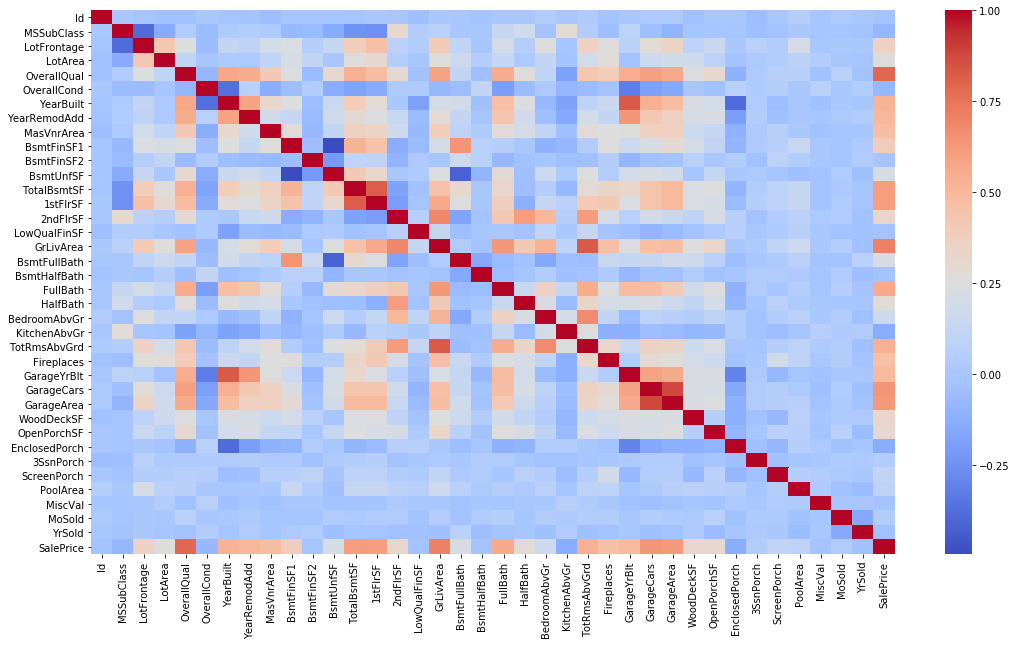

In [17]:
fig, axes = plt.subplots(figsize = (18 , 10))
sns.heatmap(df_train.corr(), cmap='coolwarm')

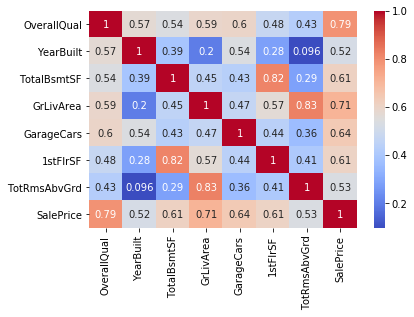

In [22]:
sns.heatmap(df_train[['OverallQual','YearBuilt','TotalBsmtSF','GrLivArea','GarageCars','1stFlrSF','TotRmsAbvGrd','SalePrice']].corr(), cmap='coolwarm', annot = True)

### 1. Understanding the 'SalePrice'

In [24]:
# Descriptive Statistical summary
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

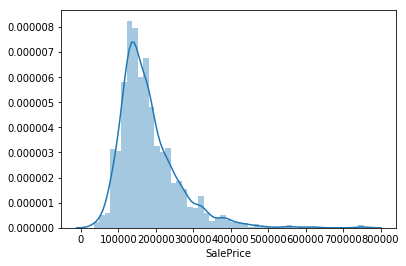

In [25]:
sns.distplot(df_train['SalePrice'])

In [27]:
# Skewness and Kurtosis
print ('Skewness : ',df_train['SalePrice'].skew())
print ('Kurtosis : ',df_train['SalePrice'].kurt())

Skewness :  1.8828757597682129
Kurtosis :  6.536281860064529


### Relationship with Numerical Variables

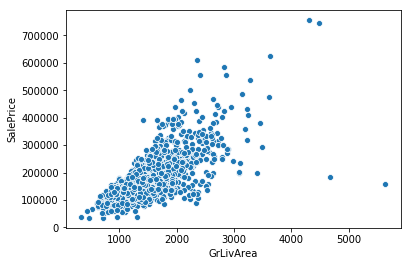

In [29]:
# Scatter Plot GrLivArea and SalePrice
sns.scatterplot(x = 'GrLivArea', y='SalePrice', data = df_train)

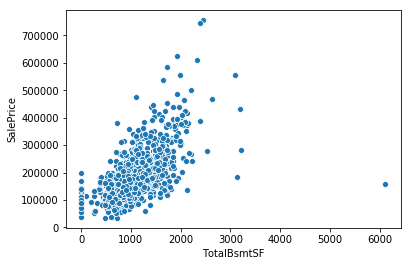

In [31]:
# Scatter Plot TotalBsmtSF and SalePrice
sns.scatterplot(x = 'TotalBsmtSF', y ='SalePrice', data = df_train)

It seems that TotalBsmstSF has strong Linear then exponential relationship with SalePrice and sometimes it doesn't add value to SalePrice and GrLiveArea and SalePrice are linearly related.

### Relationship with Categorical Feature

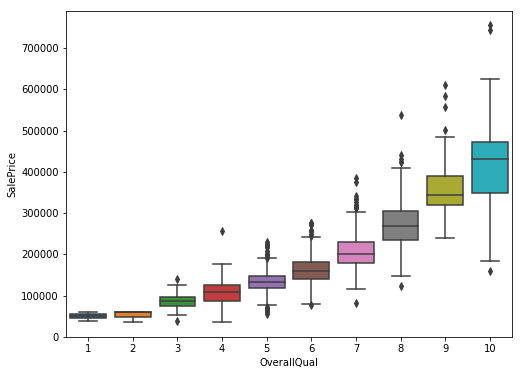

In [39]:
# Boxplot OverallQual and SalePrice
fig, axes = plt.subplots(figsize= (8,6))
f =sns.boxplot(x = 'OverallQual',y ='SalePrice', data = df_train)
f.axis(ymin = 0, y_max = 80000);

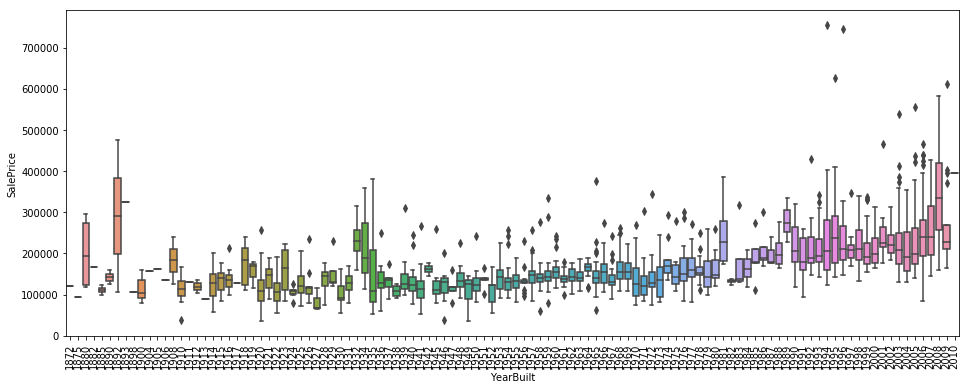

In [43]:
# Boxplot YearBuilt and SalePrice
fig , ax = plt.subplots(figsize = (16, 6))
plt.xticks(rotation = 90)
sns.boxplot(x = 'YearBuilt', y ='SalePrice', data = df_train)

Although its not a strong relationship, SalePrice tend to increase with newer dated buildings.

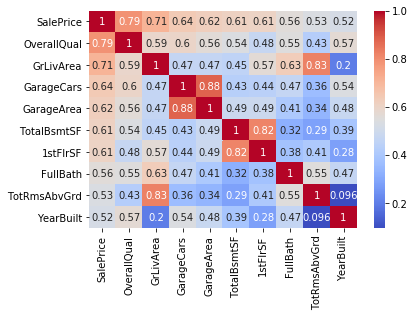

In [66]:
# Heatmap of top 10 most correlated columns.
sns.heatmap(data = df_train[df_train.corrwith(df_train['SalePrice']).sort_values(ascending =False).head(10).index].corr(), annot = True, cmap = 'coolwarm')

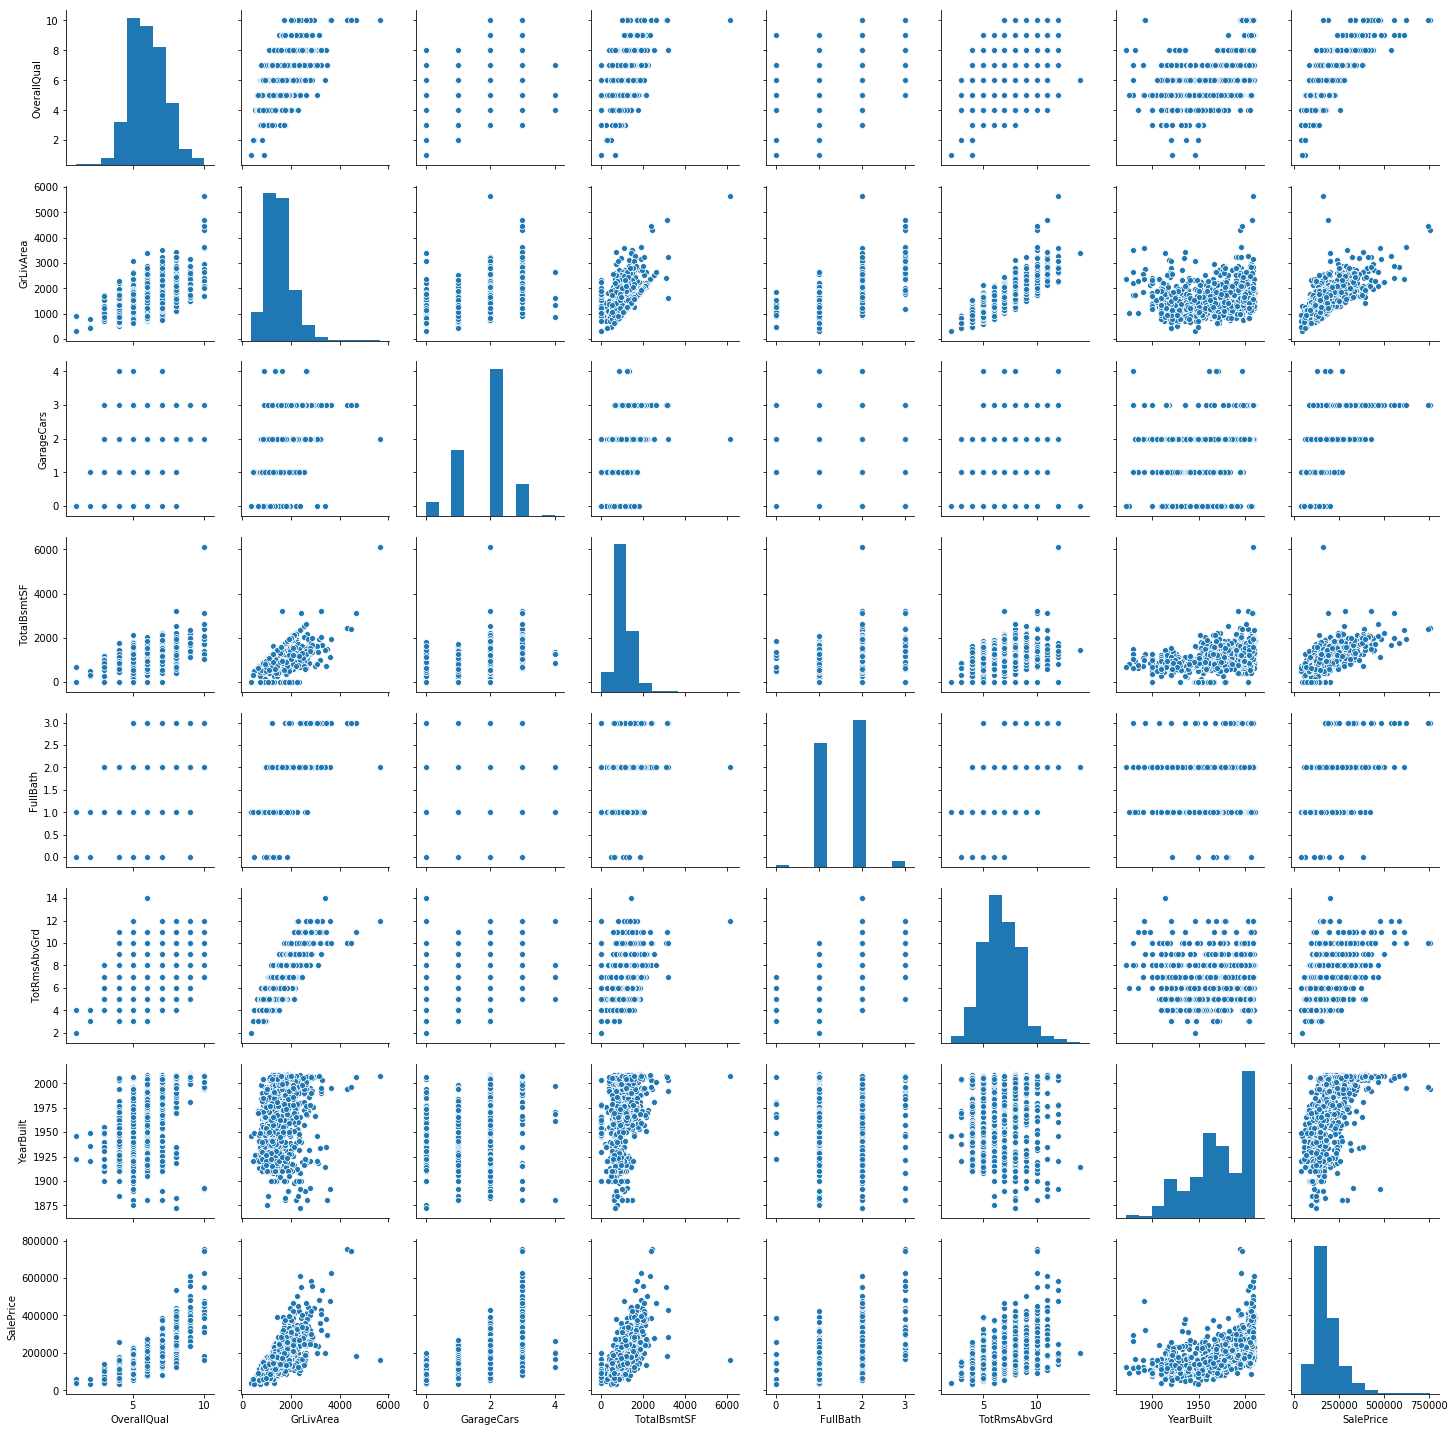

In [70]:
sns.pairplot(df_train[['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'SalePrice']], size = 2.5)

### Missing Data

In [86]:
# Missing Data
total_missing_data = df_train.isnull().sum().sort_values(ascending = False)
percent_missing_data = (df_train.isnull().sum()/ df_train.isnull().count()*100).sort_values(ascending = False)
missing_data = pd.concat([total_missing_data, percent_missing_data], axis = 1, keys=['Total','Percent'])
missing_data.head(20)

,Total,Percent
SalePrice,0,0.0
OverallQual,0,0.0
BsmtUnfSF,0,0.0
BsmtFinSF2,0,0.0
BsmtFinSF1,0,0.0
Foundation,0,0.0
ExterCond,0,0.0
ExterQual,0,0.0
Exterior2nd,0,0.0
Exterior1st,0,0.0


In [85]:
# Dealing with missing Data
df_train.drop(missing_data[missing_data['Total']>=1].index,1, inplace=True)

In [89]:
print ('Total NULL remaining : ',df_train.isnull().sum().max())

Total NULL remaining :  0


### Outliars

#### Univariate Analysis

The primary concern here is to establish a threshold that defines an observation as an outlier. To do so we will standardize the data. In this context data standardization meaning converting data value to have a mean of 0 and standard deviation equal to 1.

In [94]:
saleprice_scaled = StandardScaler().fit_transform(df_train['SalePrice'][:,np.newaxis])
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
print('outer range (low) of distribution : ')
print(low_range)
print('\n outer range (high) of distribution : ')
print(high_range)

outer range (low) of distribution : 
[[-1.83870376]
 [-1.83352844]
 [-1.80092766]
 [-1.78329881]
 [-1.77448439]
 [-1.62337999]
 [-1.61708398]
 [-1.58560389]
 [-1.58560389]
 [-1.5731    ]]

 outer range (high) of distribution : 
[[3.82897043]
 [4.04098249]
 [4.49634819]
 [4.71041276]
 [4.73032076]
 [5.06214602]
 [5.42383959]
 [5.59185509]
 [7.10289909]
 [7.22881942]]


Low range value are similar and not too far away from  0. <br/>
High range value are far from 0 and 7. something are really out of range.

#### Bivariate Analysis

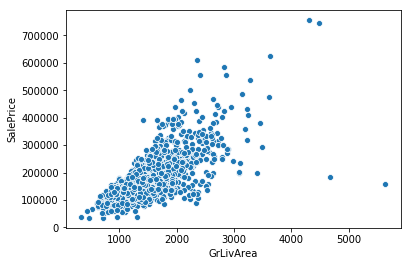

In [95]:
# Scatter plot between GrLivArea and SalePrice
sns.scatterplot(x = 'GrLivArea', y ='SalePrice',data = df_train)

In [102]:
df_train.sort_values(by = 'GrLivArea', ascending = False)[:2]
df_train.drop(df_train[df_train['Id'] == 1299].index,inplace = True)
df_train.drop(df_train[df_train['Id'] == 524].index,inplace = True)

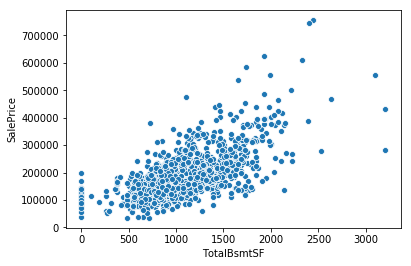

In [104]:
# Scatterplot TotalBsmtSF and SalePrice
sns.scatterplot(x ='TotalBsmtSF', y ='SalePrice', data = df_train)

##### In search for Normality

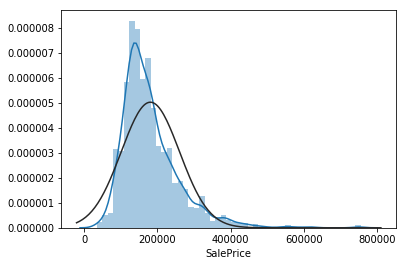

In [111]:
# Histrogram 
sns.distplot(df_train['SalePrice'], fit = norm)

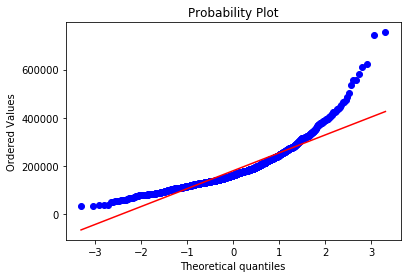

In [112]:
# Normal Probability Plot
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot = plt)

SalePrice is not normal, it is showing positive skewness and does not follow diagonal line.
In case of positive skewness, log tranformation usually works well.

In [113]:
# Applying log Transformation
df_train['SalePrice'] = np.log(df_train['SalePrice'])

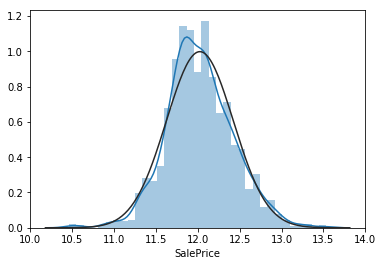

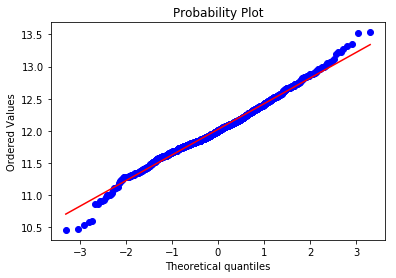

In [115]:
# Transformed histrogram and noraml probability plot
sns.distplot(df_train['SalePrice'], fit = norm)
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'],plot = plt)

Done! Let's check what's going on with 'GrLivArea'.

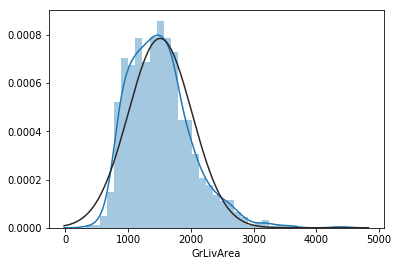

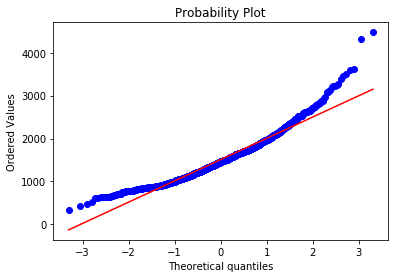

In [116]:
# Histrogram and Normal Probability Plot
sns.distplot(df_train['GrLivArea'], fit = norm)
fig = plt.figure()
res = stats.probplot(df_train['GrLivArea'], plot = plt)

Tastes like positive skewness.

In [117]:
# Log Transformation of GrLivArea
df_train['GrLivArea']  = np.log(df_train['GrLivArea'])

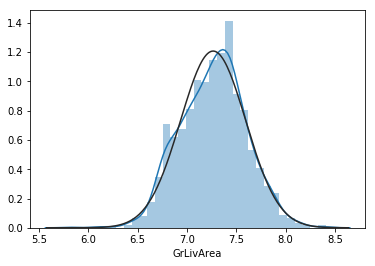

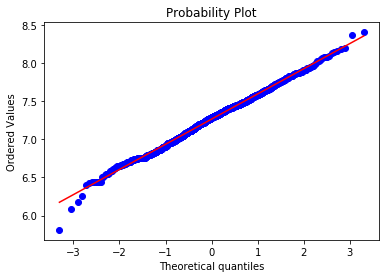

In [118]:
# Transformed Histogram and Normal Probability
sns.distplot(df_train['GrLivArea'], fit = norm)
fig = plt.figure()
res = stats.probplot(df_train['GrLivArea'], plot = plt)

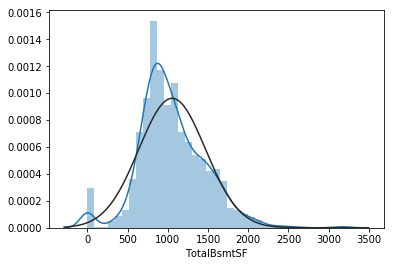

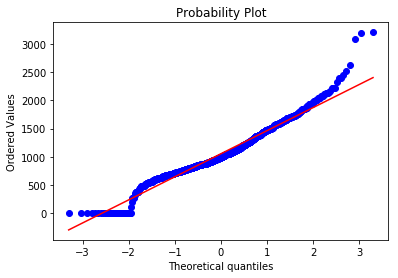

In [119]:
# Histrogram and Normal Probability Plot for TotalBsmtSF
sns.distplot(df_train['TotalBsmtSF'], fit = norm)
fig = plt.figure()
res = stats.probplot(df_train['TotalBsmtSF'], plot = plt)

A big problem because a value zero does not allow us to do log transformation.

In [121]:
# Create a new Column HasBsmt.
df_train['HasBsmt'] = df_train['TotalBsmtSF'].apply(lambda x : 1 if x > 0 else 0)

In [123]:
df_train.loc[df_train['HasBsmt'] == 1, 'TotalBsmtSF'] = np.log(df_train['TotalBsmtSF']) 

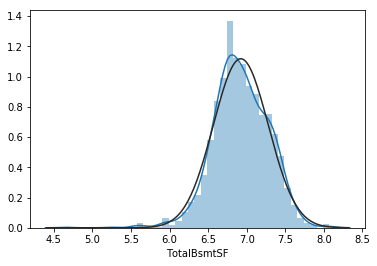

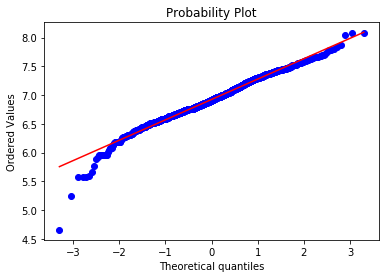

In [124]:
#histogram and normal probability plot
sns.distplot(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], plot=plt)

#### Homoscedasticity

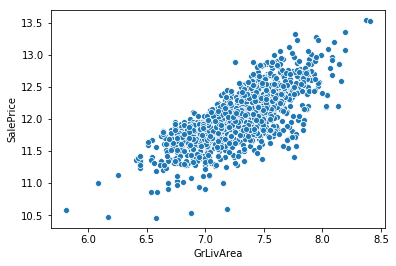

In [125]:
# Scatterplot GrLivArea and SalePrice
sns.scatterplot(x = 'GrLivArea', y ='SalePrice', data = df_train)

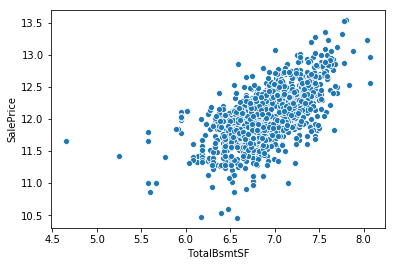

In [128]:
# Scatterpllot TotalBsmtSF and SalePrice
sns.scatterplot(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], df_train[df_train['TotalBsmtSF']>0]['SalePrice']);

### Last but not least Dummy variables

In [130]:
df_train = pd.get_dummies(df_train)

In [131]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1456 entries, 0 to 1459
Columns: 217 entries, Id to SaleCondition_Partial
dtypes: float64(3), int64(33), uint8(181)
memory usage: 718.2 KB
